# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
!pip install yfinance
import yfinance as yf
from pandas.plotting import scatter_matrix

Defaulting to user installation because normal site-packages is not writeable


# Downloading the Data

I've downloaded APPLE, MICROSOFT, GOOGLE, AMAZON, TESLA companies stocks  from 2019 to 2023 using Ticker.

In [2]:

apple_df=yf.Ticker('AAPL')
mcro_df=yf.Ticker('MSFT')
google_df=yf.Ticker('GOOGL')
amazon_df=yf.Ticker('AMZN')
tesla_df=yf.Ticker('TSLA')

In [3]:
apple=apple_df.history(period='5y')
mcro=mcro_df.history(period='5y')
google=google_df.history(period='5y')
amazon=amazon_df.history(period='5y')
tesla=tesla_df.history(period='5y')


# Data preparation

Loading some of the first and last rows using head() and tail() function.

In [4]:
apple.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-09-14 00:00:00-04:00,54.052095,54.313076,53.278726,53.594776,127997200,0.0,0.0
2018-09-17 00:00:00-04:00,53.190125,53.381673,52.021693,52.167747,148780400,0.0,0.0
2018-09-18 00:00:00-04:00,52.146212,53.118315,51.985792,52.253960,126286800,0.0,0.0
2018-09-19 00:00:00-04:00,52.316204,52.584368,51.550017,52.285076,108495200,0.0,0.0
2018-09-20 00:00:00-04:00,52.732812,53.221255,52.471827,52.682529,106435200,0.0,0.0


In [5]:
apple.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-09-07 00:00:00-04:00,175.179993,178.210007,173.539993,177.559998,112488800,0.0,0.0
2023-09-08 00:00:00-04:00,178.350006,180.240005,177.789993,178.179993,65551300,0.0,0.0
2023-09-11 00:00:00-04:00,180.070007,180.300003,177.339996,179.360001,58953100,0.0,0.0
2023-09-12 00:00:00-04:00,179.490005,180.130005,174.820007,176.300003,90370200,0.0,0.0
2023-09-13 00:00:00-04:00,176.509995,177.300003,173.979996,174.210007,84165800,0.0,0.0


In [6]:
mcro.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-09-14 00:00:00-04:00,107.400832,107.751385,106.529197,107.410309,19122300,0.0,0.0
2018-09-17 00:00:00-04:00,107.713502,107.722971,105.979700,106.244980,20736500,0.0,0.0
2018-09-18 00:00:00-04:00,106.292351,107.722967,105.847057,107.258728,22170900,0.0,0.0
2018-09-19 00:00:00-04:00,107.107133,107.362936,105.202793,105.828094,21728400,0.0,0.0
2018-09-20 00:00:00-04:00,106.377605,107.817705,106.046005,107.599792,23714500,0.0,0.0


In [7]:
mcro.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-09-07 00:00:00-04:00,331.290009,333.079987,329.029999,329.910004,18381000,0.0,0.0
2023-09-08 00:00:00-04:00,330.089996,336.160004,329.459991,334.269989,19530100,0.0,0.0
2023-09-11 00:00:00-04:00,337.239990,338.420013,335.429993,337.940002,16583300,0.0,0.0
2023-09-12 00:00:00-04:00,335.820007,336.790009,331.480011,331.769989,17565500,0.0,0.0
2023-09-13 00:00:00-04:00,331.309998,336.850006,331.170013,336.059998,16527400,0.0,0.0


In [8]:
google.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-09-14 00:00:00-04:00,59.400002,59.400002,58.675999,58.898998,24176000,0.0,0.0
2018-09-17 00:00:00-04:00,58.888500,59.091000,57.923000,57.991501,34096000,0.0,0.0
2018-09-18 00:00:00-04:00,58.132999,59.066502,58.071499,58.355499,32314000,0.0,0.0
2018-09-19 00:00:00-04:00,58.448002,58.813499,57.931000,58.713501,25962000,0.0,0.0
2018-09-20 00:00:00-04:00,59.033501,59.700001,58.812500,59.578499,29244000,0.0,0.0


In [9]:
google.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-09-07 00:00:00-04:00,133.589996,135.580002,132.949997,135.259995,18844300,0.0,0.0
2023-09-08 00:00:00-04:00,134.910004,136.660004,134.850006,136.380005,23558300,0.0,0.0
2023-09-11 00:00:00-04:00,136.539993,137.479996,135.789993,136.919998,20763400,0.0,0.0
2023-09-12 00:00:00-04:00,136.259995,136.869995,135.190002,135.339996,18405500,0.0,0.0
2023-09-13 00:00:00-04:00,135.089996,136.899994,134.149994,136.710007,20738700,0.0,0.0


In [10]:
amazon.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-09-14 00:00:00-04:00,99.646500,99.682503,97.960999,98.509499,72840000,0.0,0.0
2018-09-17 00:00:00-04:00,97.736504,97.841003,94.370499,95.401497,141004000,0.0,0.0
2018-09-18 00:00:00-04:00,95.932503,97.910004,95.772003,97.052498,85374000,0.0,0.0
2018-09-19 00:00:00-04:00,97.025002,97.041496,95.245003,96.320999,81136000,0.0,0.0
2018-09-20 00:00:00-04:00,96.929001,97.750000,96.612503,97.214996,63098000,0.0,0.0


In [11]:
amazon.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-09-07 00:00:00-04:00,133.899994,138.029999,133.160004,137.850006,48498900,0.0,0.0
2023-09-08 00:00:00-04:00,136.860001,138.850006,136.750000,138.229996,38348200,0.0,0.0
2023-09-11 00:00:00-04:00,138.750000,143.619995,138.639999,143.100006,56764500,0.0,0.0
2023-09-12 00:00:00-04:00,142.320007,143.000000,140.610001,141.229996,42668500,0.0,0.0
2023-09-13 00:00:00-04:00,140.949997,144.979996,140.869995,144.850006,60338700,0.0,0.0


In [12]:
tesla.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-09-14 00:00:00-04:00,19.250668,19.822001,19.101334,19.680000,101484000,0.0,0.0
2018-09-17 00:00:00-04:00,19.336000,20.058001,19.208668,19.656000,103314000,0.0,0.0
2018-09-18 00:00:00-04:00,19.779333,20.176001,18.366667,18.997334,248212500,0.0,0.0
2018-09-19 00:00:00-04:00,18.700666,20.000000,18.700001,19.934668,124423500,0.0,0.0
2018-09-20 00:00:00-04:00,20.237333,20.398666,19.555332,19.888666,110241000,0.0,0.0


In [13]:
tesla.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-09-07 00:00:00-04:00,245.070007,252.809998,243.270004,251.490005,115312900,0.0,0.0
2023-09-08 00:00:00-04:00,251.220001,256.519989,246.669998,248.500000,118367700,0.0,0.0
2023-09-11 00:00:00-04:00,264.269989,274.850006,260.609985,273.579987,174667900,0.0,0.0
2023-09-12 00:00:00-04:00,270.760010,278.390015,266.600006,267.480011,135999900,0.0,0.0
2023-09-13 00:00:00-04:00,270.070007,274.980011,268.100006,271.299988,111423100,0.0,0.0


#####  <p style='text-align:justify;'>knowing about statistical data of different companies using describe function.</p>

In [14]:
apple.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.000000
mean,113.597754,114.940446,112.335460,113.694200,1.080611e+08,0.003369,0.003182
std,47.220637,47.709556,46.748403,47.242855,5.509258e+07,0.026606,0.112822
min,34.593909,35.011979,34.118178,34.163830,3.145820e+07,0.000000,0.000000
25%,64.040155,64.598639,63.574344,64.052353,7.301280e+07,0.000000,0.000000
50%,126.412537,127.866883,124.745158,125.925598,9.360460e+07,0.000000,0.000000
75%,150.318251,152.831932,148.812928,150.647263,1.271116e+08,0.000000,0.000000
max,195.975362,197.962667,195.016650,196.185074,4.265100e+08,0.240000,4.000000


In [15]:
mcro.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.000000,1257.0
mean,217.475897,219.785314,215.097391,217.540902,3.023829e+07,0.009006,0.0
std,72.961438,73.672633,72.249765,72.979243,1.292743e+07,0.071530,0.0
min,90.528034,93.220843,89.405235,89.566986,8.989200e+06,0.000000,0.0
25%,145.138415,146.644736,144.336970,144.944229,2.208470e+07,0.000000,0.0
50%,229.722500,232.096153,226.472218,229.106659,2.701870e+07,0.000000,0.0
75%,278.256517,281.128909,274.640957,277.845581,3.426400e+07,0.000000,0.0
max,360.985725,366.005075,351.695397,358.730469,1.112421e+08,0.680000,0.0


In [16]:
google.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.0,1257.000000
mean,93.442468,94.530845,92.408343,93.491383,3.449948e+07,0.0,0.015911
std,29.909510,30.200401,29.585227,29.883116,1.542502e+07,0.0,0.564108
min,49.216000,50.605999,48.882999,49.233501,9.312000e+06,0.0,0.000000
25%,63.514999,63.993999,62.900002,63.558498,2.474520e+07,0.0,0.000000
50%,92.139999,93.559998,90.639999,91.790001,3.071000e+07,0.0,0.000000
75%,118.800003,120.190002,117.750000,118.930000,3.934200e+07,0.0,0.000000
max,151.250000,151.546494,148.899002,149.838501,1.331780e+08,0.0,20.000000


In [17]:
amazon.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.0,1257.000000
mean,124.536422,126.086509,122.857769,124.480630,8.110502e+07,0.0,0.015911
std,32.648963,32.937545,32.293708,32.578159,3.828471e+07,0.0,0.564108
min,67.300003,69.801498,65.349998,67.197998,1.762600e+07,0.0,0.000000
25%,93.543999,94.684998,92.472000,93.489998,5.562400e+07,0.0,0.000000
50%,119.650002,121.500000,117.818497,120.110001,6.966800e+07,0.0,0.000000
75%,158.350006,159.937500,156.250000,158.100494,9.545800e+07,0.0,0.000000
max,187.199997,188.654007,184.839493,186.570496,3.113460e+08,0.0,20.000000


In [18]:
tesla.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.0,1257.000000
mean,157.960984,161.591406,154.046592,157.917704,1.351146e+08,0.0,0.006364
std,112.308185,114.782729,109.521536,112.162515,8.744830e+07,0.0,0.164407
min,12.073333,12.445333,11.799333,11.931333,2.940180e+07,0.0,0.000000
25%,24.676666,25.299334,24.166668,24.450666,7.913400e+07,0.0,0.000000
50%,181.220001,186.160004,177.649994,182.860001,1.088634e+08,0.0,0.000000
75%,246.783340,252.286667,241.899994,246.066666,1.620615e+08,0.0,0.000000
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08,0.0,5.000000


# Exploratory Data Analysis and Visualization

Time Series Data

Time-series data is a sequence of data points collected over time intervals, allowing us to track changes over time.
Exploratoy analysis and visualization makes the understanding of the data.
Data visualization is a visual representation of data through displays such as graphs, charts, plots and even animations.These visuals forms the data relationships and insights easy to understand.




# Plotting Open stock prices of companies

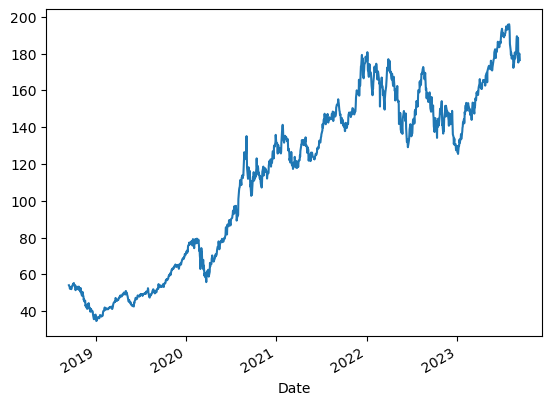

In [19]:
apple['Open'].plot();

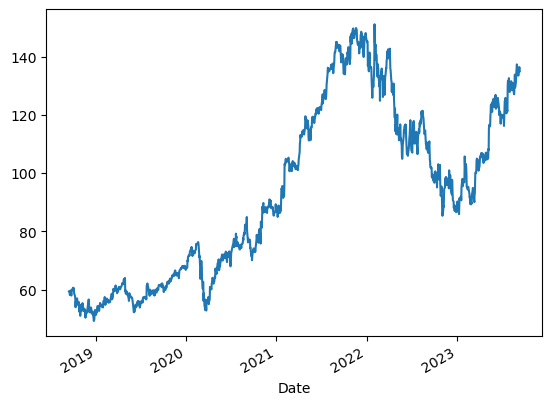

In [20]:
google['Open'].plot();

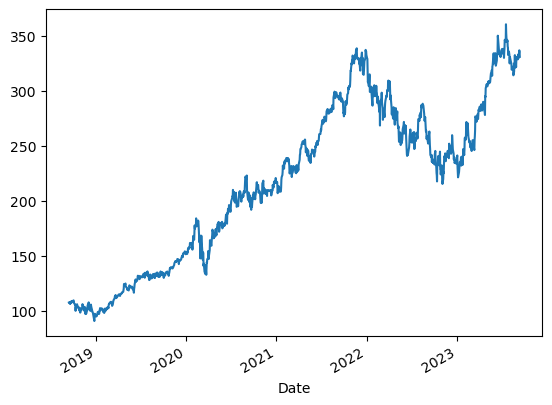

In [21]:
mcro['Open'].plot();

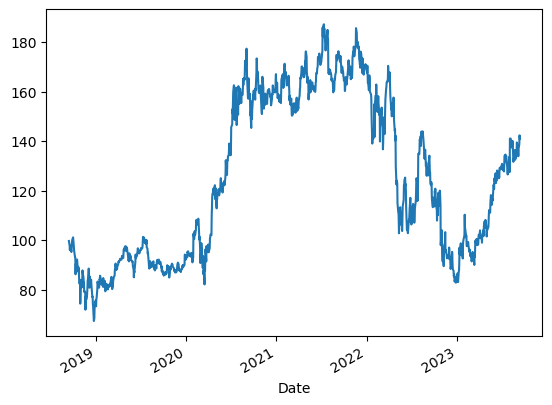

In [22]:
amazon['Open'].plot();

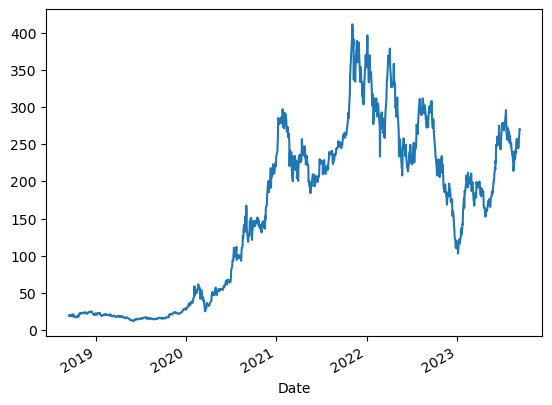

In [23]:
tesla['Open'].plot();

In [24]:
import matplotlib.dates as mdates

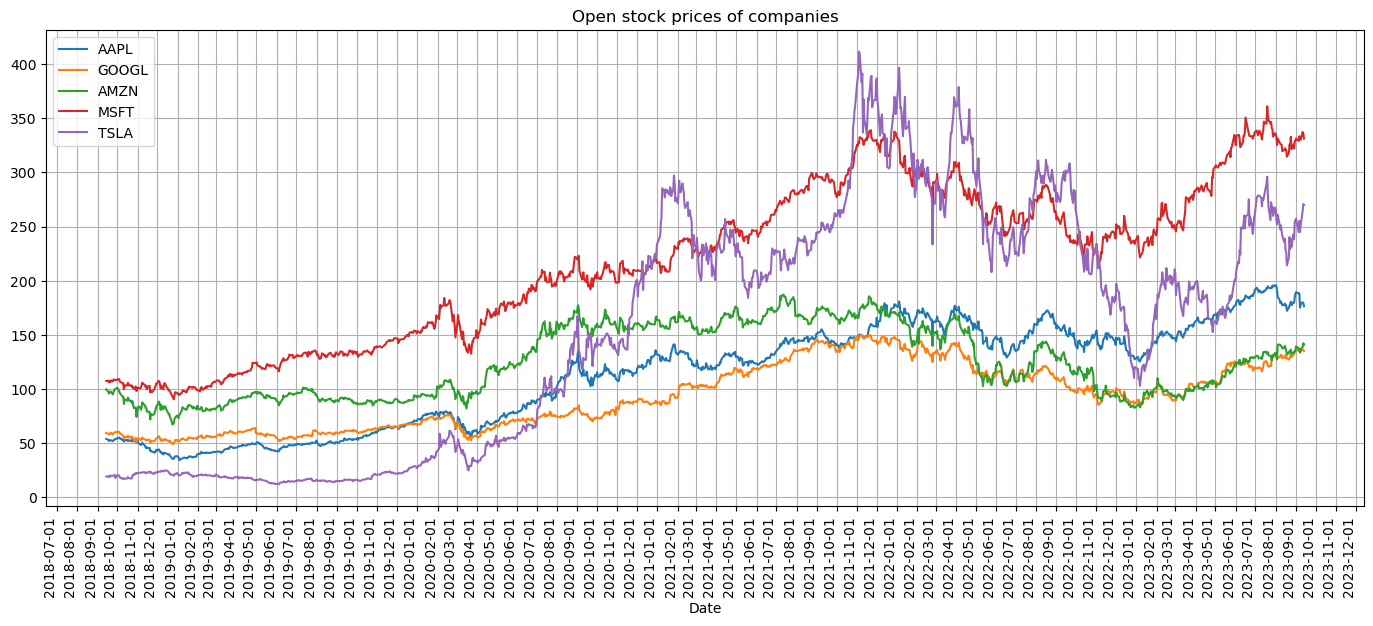

In [25]:
plt.figure(figsize=(17,7))

apple['Open'].plot(label='AAPL')
google['Open'].plot(label='GOOGL')
amazon['Open'].plot(label='AMZN')
mcro['Open'].plot(label='MSFT')
tesla['Open'].plot(label='TSLA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Open stock prices of companies')
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show();

# Plotting Close stock price of companies

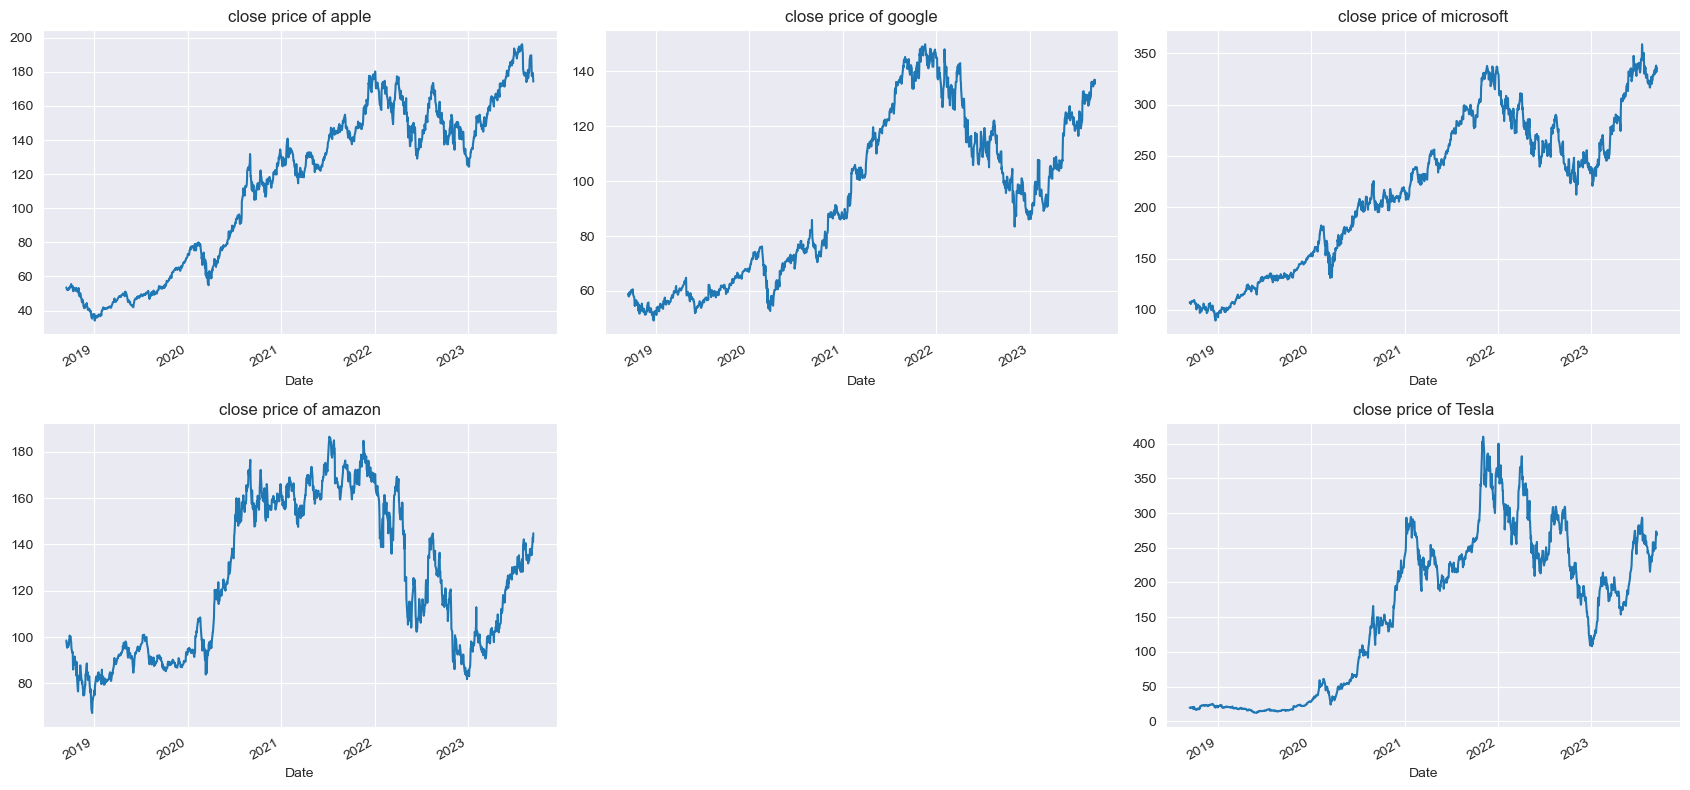

In [26]:
sns.set_style('darkgrid')
plt.figure(figsize=(17, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(2,3,1)
apple['Close'].plot()
plt.title('close price of apple')

plt.subplot(2,3,2)
google['Close'].plot()
plt.title('close price of google')

plt.subplot(2,3,3)
mcro['Close'].plot()
plt.title('close price of microsoft')


plt.subplot(2,3,4)
amazon['Close'].plot()
plt.title('close price of amazon')

plt.subplot(2,3,6)
tesla['Close'].plot()
plt.title('close price of Tesla')

plt.tight_layout()
plt.show();

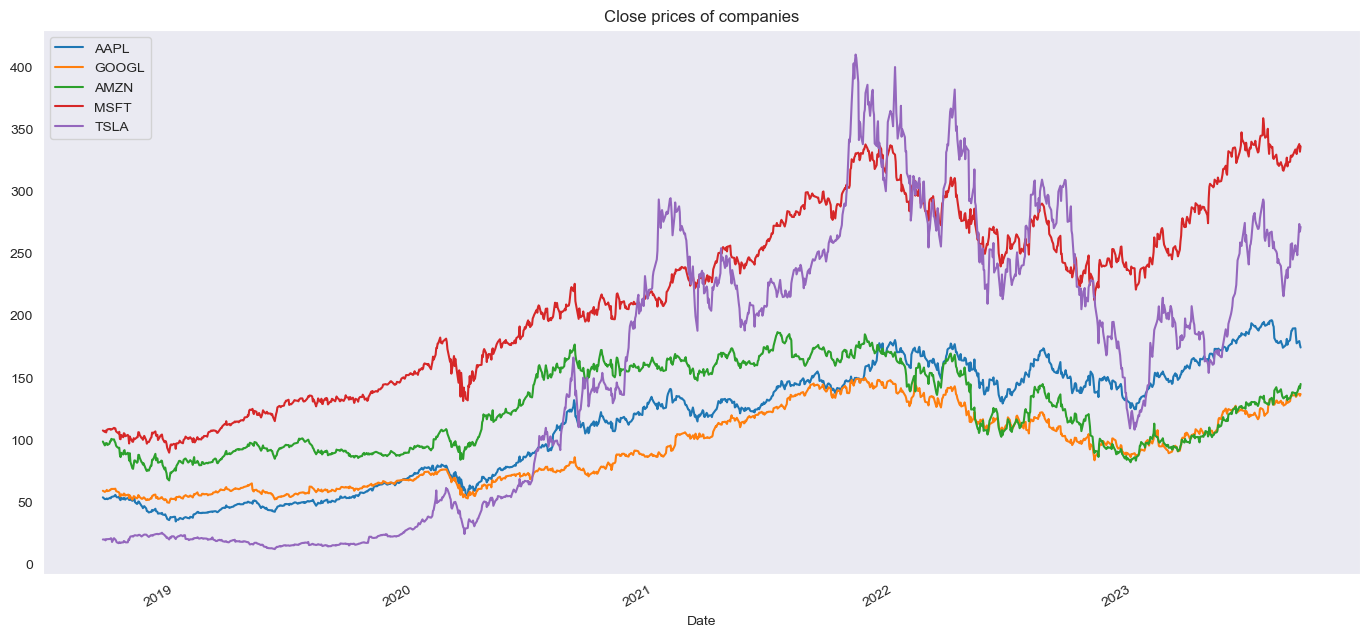

In [27]:
plt.figure(figsize=(17,8))

apple['Close'].plot(label='AAPL')
google['Close'].plot(label='GOOGL')
amazon['Close'].plot(label='AMZN')
mcro['Close'].plot(label='MSFT')
tesla['Close'].plot(label='TSLA')

plt.title('Close prices of companies')
plt.grid()
plt.legend();

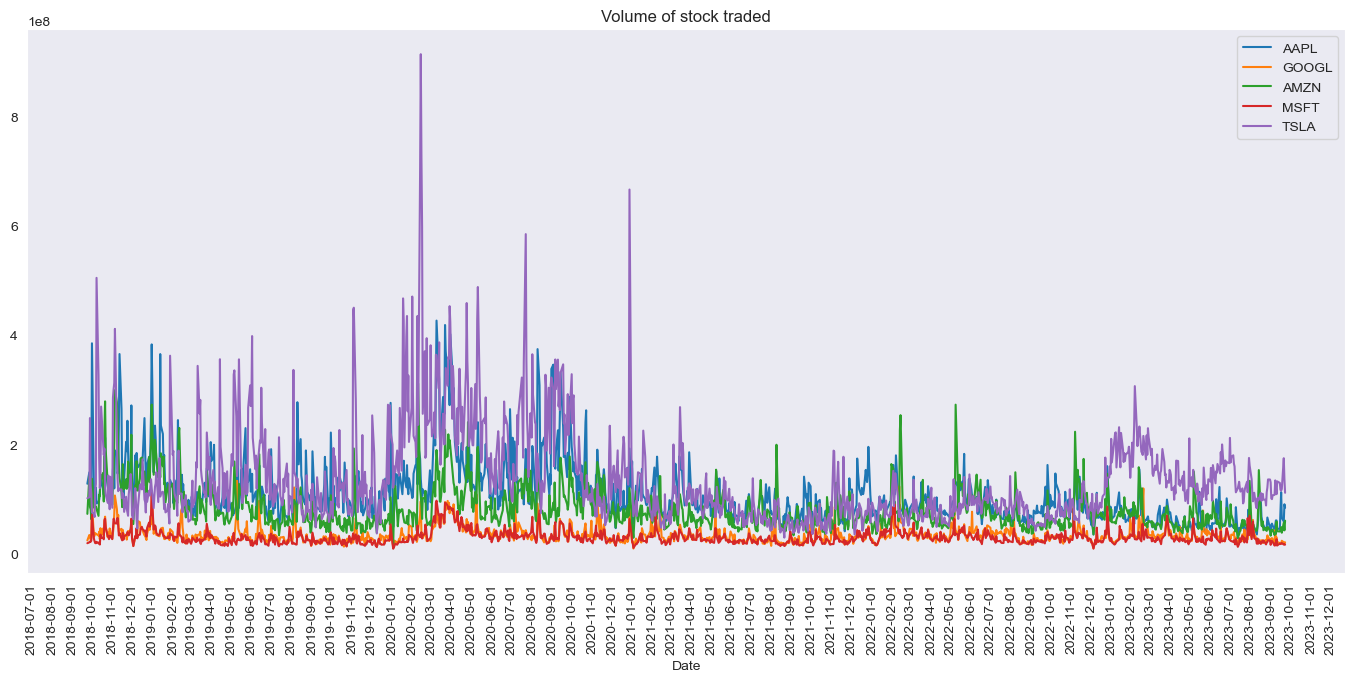

In [28]:
plt.figure(figsize=(17,8))

apple['Volume'].plot(label='AAPL')
google['Volume'].plot(label='GOOGL')
amazon['Volume'].plot(label='AMZN')
mcro['Volume'].plot(label='MSFT')
tesla['Volume'].plot(label='TSLA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Volume of stock traded')
plt.grid()
plt.xticks(rotation=90)
plt.legend()
plt.show();

# Market capitalization

Market capitalization, sometimes referred to as market cap, is the total value of a publicly traded company's outstanding common shares owned by stockholders.You can calculate a company's market cap by multiplying the total number of outstanding shares by the value-per-share on the stock market


In [29]:
#Market capitalization
apple['Marketcap'] = apple['Open']*apple['Volume']
google['Marketcap'] = google['Open']*google['Volume']
mcro['Marketcap'] = mcro['Open']*mcro['Volume']
amazon['Marketcap'] = amazon['Open']*amazon['Volume']
tesla['Marketcap'] = tesla['Open']*tesla['Volume']

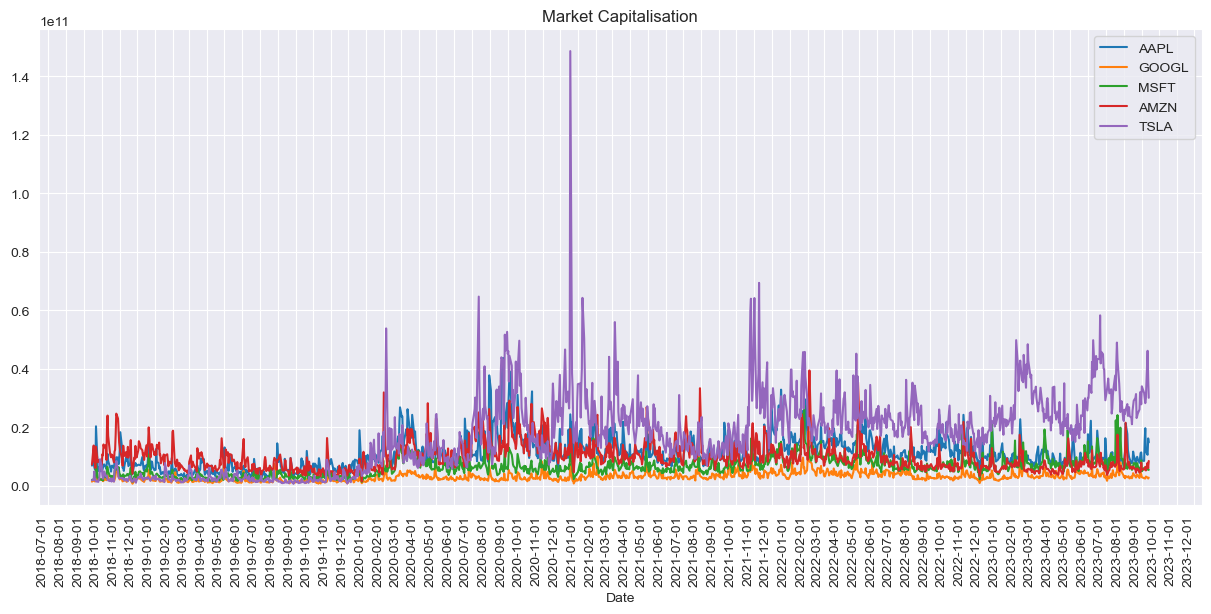

In [30]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))

apple['Marketcap'].plot(label='AAPL')
google['Marketcap'].plot(label='GOOGL')
mcro['Marketcap'].plot(label='MSFT')
amazon['Marketcap'].plot(label='AMZN')
tesla['Marketcap'].plot(label='TSLA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Market Capitalisation')
plt.xticks(rotation=90)
plt.legend();

# Moving Averages of stock prices

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price.we can calculate MA using rolling() method in python.

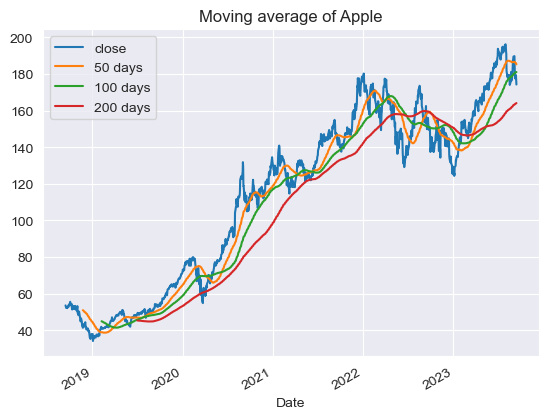

In [31]:
apple['Close'].plot(label='close')
apple['SMA50']=apple['Close'].rolling(50).mean()
apple['SMA100']=apple['Close'].rolling(100).mean()
apple['SMA200']=apple['Close'].rolling(200).mean()

apple['SMA50'].plot(label='50 days')
apple['SMA100'].plot(label='100 days')
apple['SMA200'].plot(label='200 days')

plt.title('Moving average of Apple')
plt.legend();

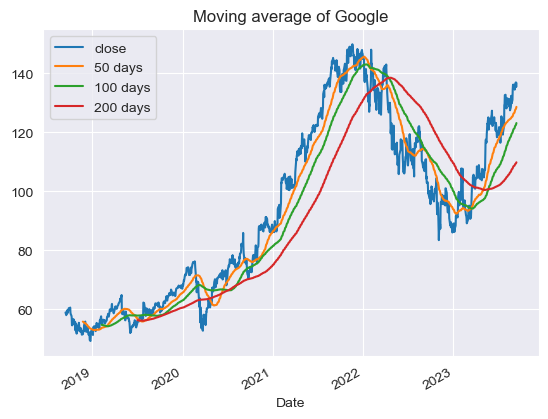

In [32]:
google['Close'].plot(label='close')
google['SMA50']=google['Close'].rolling(50).mean()
google['SMA100']=google['Close'].rolling(100).mean()
google['SMA200']=google['Close'].rolling(200).mean()

google['SMA50'].plot(label='50 days')
google['SMA100'].plot(label='100 days')
google['SMA200'].plot(label='200 days')

plt.title('Moving average of Google')
plt.legend();

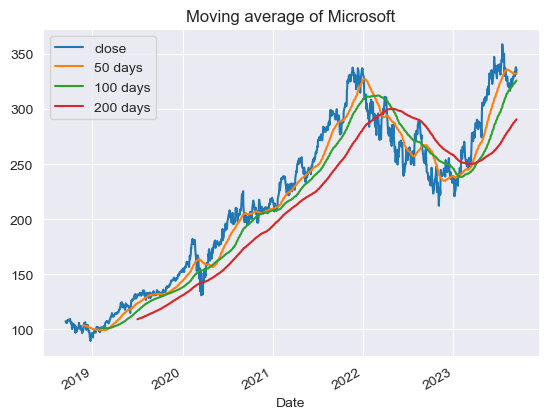

In [33]:
mcro['Close'].plot(label='close')
mcro['SMA50']=mcro['Close'].rolling(50).mean()
mcro['SMA100']=mcro['Close'].rolling(100).mean()
mcro['SMA200']=mcro['Close'].rolling(200).mean()

mcro['SMA50'].plot(label='50 days')
mcro['SMA100'].plot(label='100 days')
mcro['SMA200'].plot(label='200 days')

plt.title('Moving average of Microsoft')
plt.legend();

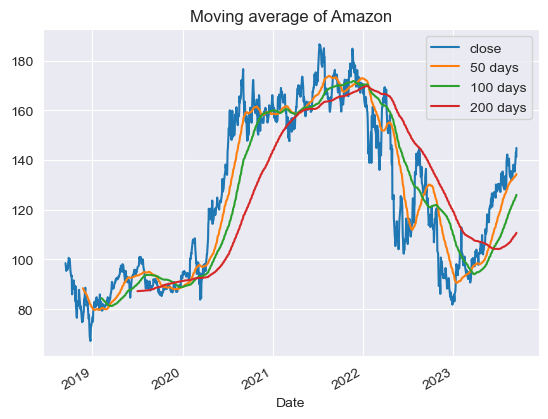

In [34]:
amazon['Close'].plot(label='close')
amazon['SMA50']=amazon['Close'].rolling(50).mean()
amazon['SMA100']=amazon['Close'].rolling(100).mean()
amazon['SMA200']=amazon['Close'].rolling(200).mean()

amazon['SMA50'].plot(label='50 days')
amazon['SMA100'].plot(label='100 days')
amazon['SMA200'].plot(label='200 days')

plt.title('Moving average of Amazon')
plt.legend();

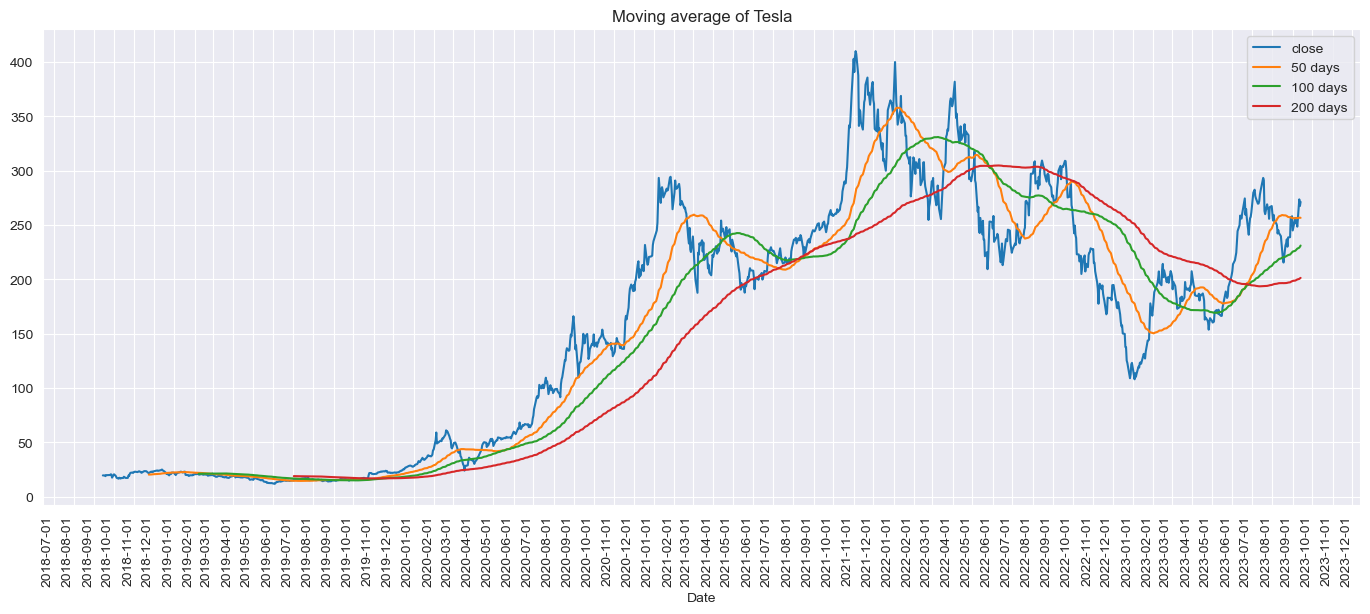

In [35]:
tesla['Close'].plot(label='close')
tesla['SMA50']=tesla['Close'].rolling(50).mean()
tesla['SMA100']=tesla['Close'].rolling(100).mean()
tesla['SMA200']=tesla['Close'].rolling(200).mean()

tesla['SMA50'].plot(label='50 days',figsize=(17,7))
tesla['SMA100'].plot(label='100 days')
tesla['SMA200'].plot(label='200 days')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Moving average of Tesla')
plt.xticks(rotation=90)
plt.legend();

# Daily returns of the stock

Daily return on a stock is used to measure the day to day performance of stocks, it is the price of stocks at today’s closure compared to the price of the same stock at yesterday’s closure.

In [36]:
#Daily return of the stock 
apple['Dailyreturn']=(apple['Close']/apple['Close'].shift(1))-1
google['Dailyreturn']=(google['Close']/google['Close'].shift(1))-1
mcro['Dailyreturn']=(mcro['Close']/mcro['Close'].shift(1))-1
amazon['Dailyreturn']=(amazon['Close']/amazon['Close'].shift(1))-1
tesla['Dailyreturn']=(tesla['Close']/tesla['Close'].shift(1))-1


Replacing all NaN values with 0.

In [37]:
apple['Dailyreturn'].fillna(0,inplace=True)
google['Dailyreturn'].fillna(0,inplace=True)
mcro['Dailyreturn'].fillna(0,inplace=True)
amazon['Dailyreturn'].fillna(0,inplace=True)
tesla['Dailyreturn'].fillna(0,inplace=True)

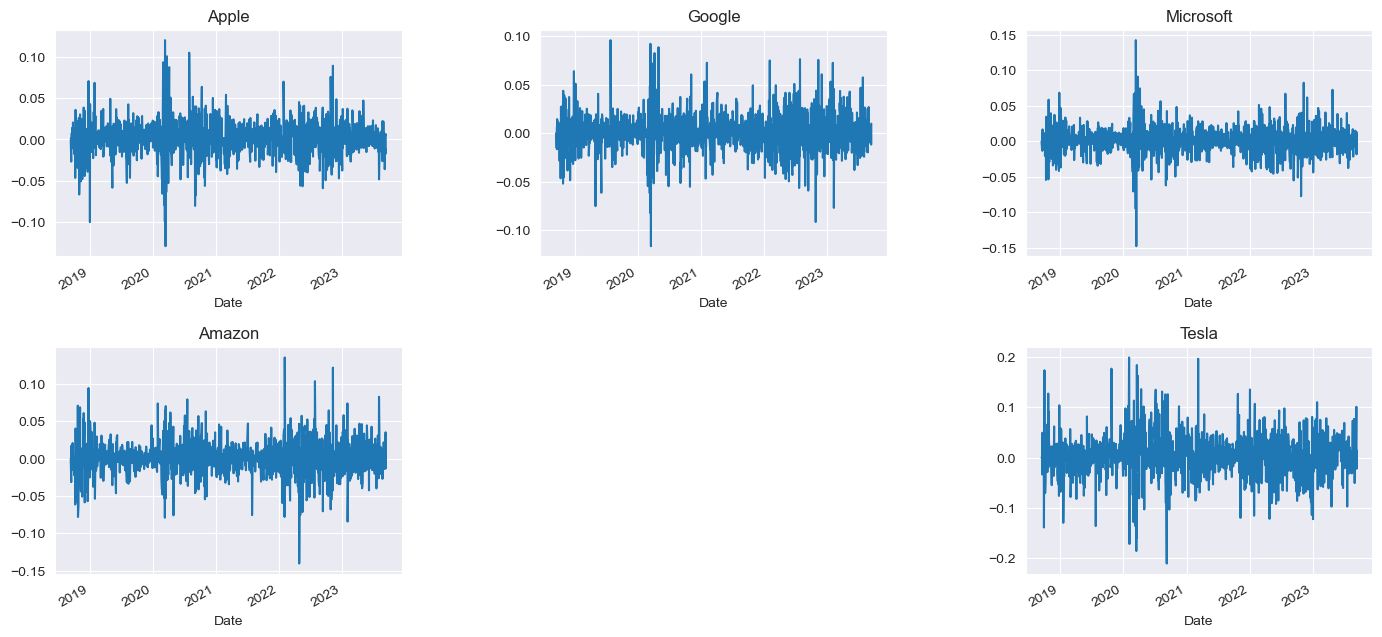

In [38]:
sns.set_style('darkgrid')
plt.figure(figsize=(17, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(2,3,1)
apple['Dailyreturn'].plot()
plt.title('Apple')

plt.subplot(2,3,2)
google['Dailyreturn'].plot()
plt.title('Google')

plt.subplot(2,3,3)
mcro['Dailyreturn'].plot()
plt.title('Microsoft')

plt.subplot(2,3,4)
amazon['Dailyreturn'].plot()
plt.title('Amazon')

plt.subplot(2,3,6)
tesla['Dailyreturn'].plot()
plt.title('Tesla')

plt.tight_layout
plt.show();

The Volatility of a stock is the measurement of the change in variance in the returns of a stock over a specified period of time.The higher the volatility, the riskier the investment in the stock.

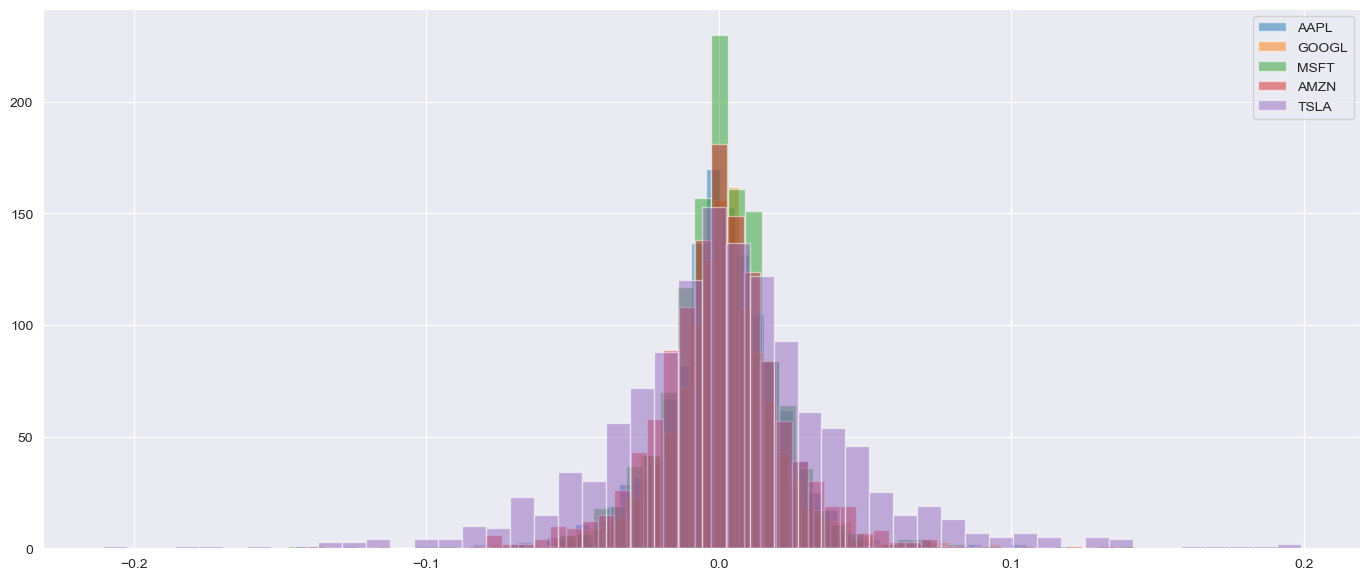

In [39]:

apple['Dailyreturn'].hist(bins=50,alpha=0.50,label='AAPL',figsize=(17,7))
google['Dailyreturn'].hist(bins=50,alpha=0.50,label='GOOGL')
mcro['Dailyreturn'].hist(bins=50,alpha=0.50,label='MSFT')
amazon['Dailyreturn'].hist(bins=50,alpha=0.50,label='AMZN')
tesla['Dailyreturn'].hist(bins=50,alpha=0.50,label='TSLA')
plt.legend();

From the above graph TESLA is the widest which indicates the stock of TESLA is the most volatile among the other companies compared.

# Correlation between different stocks 

Correlation is a statistic that measures the degree to which two securities move in relation to each other.

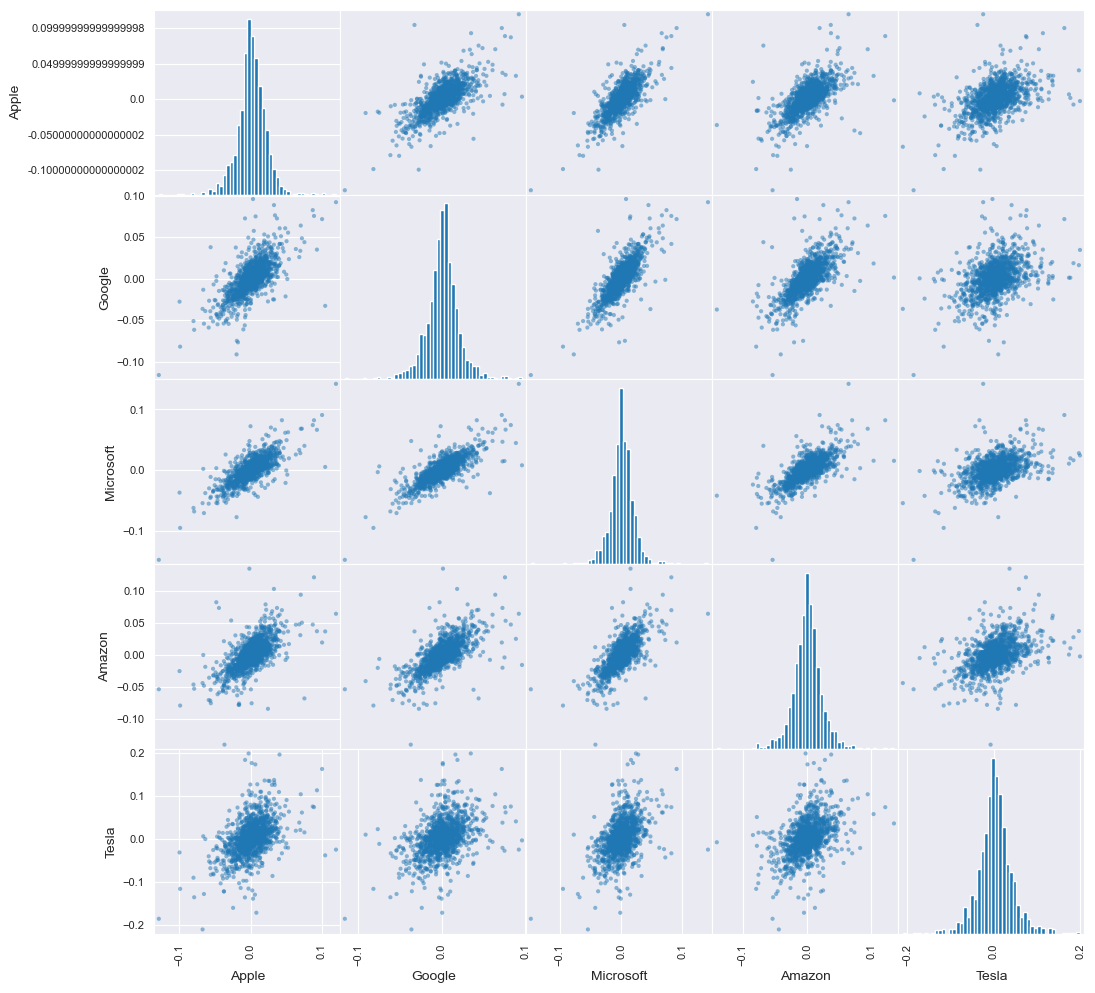

In [40]:
#correlation between different stocks daily return
stock_df=pd.concat([apple['Dailyreturn'],google['Dailyreturn'],mcro['Dailyreturn'],amazon['Dailyreturn'],tesla['Dailyreturn']],axis=1)
stock_df.columns=['Apple','Google','Microsoft','Amazon','Tesla']
scatter_matrix(stock_df,figsize=(12,12),hist_kwds={'bins':50},alpha=0.5);

The above graph is the combination of histograms for each company and a subsequent scattered plot taking four companies’ stocks at a time. From the graph, we can roughly figure out that Apple stocks are loosely showing a linear correlation with either Google or Microsoft.

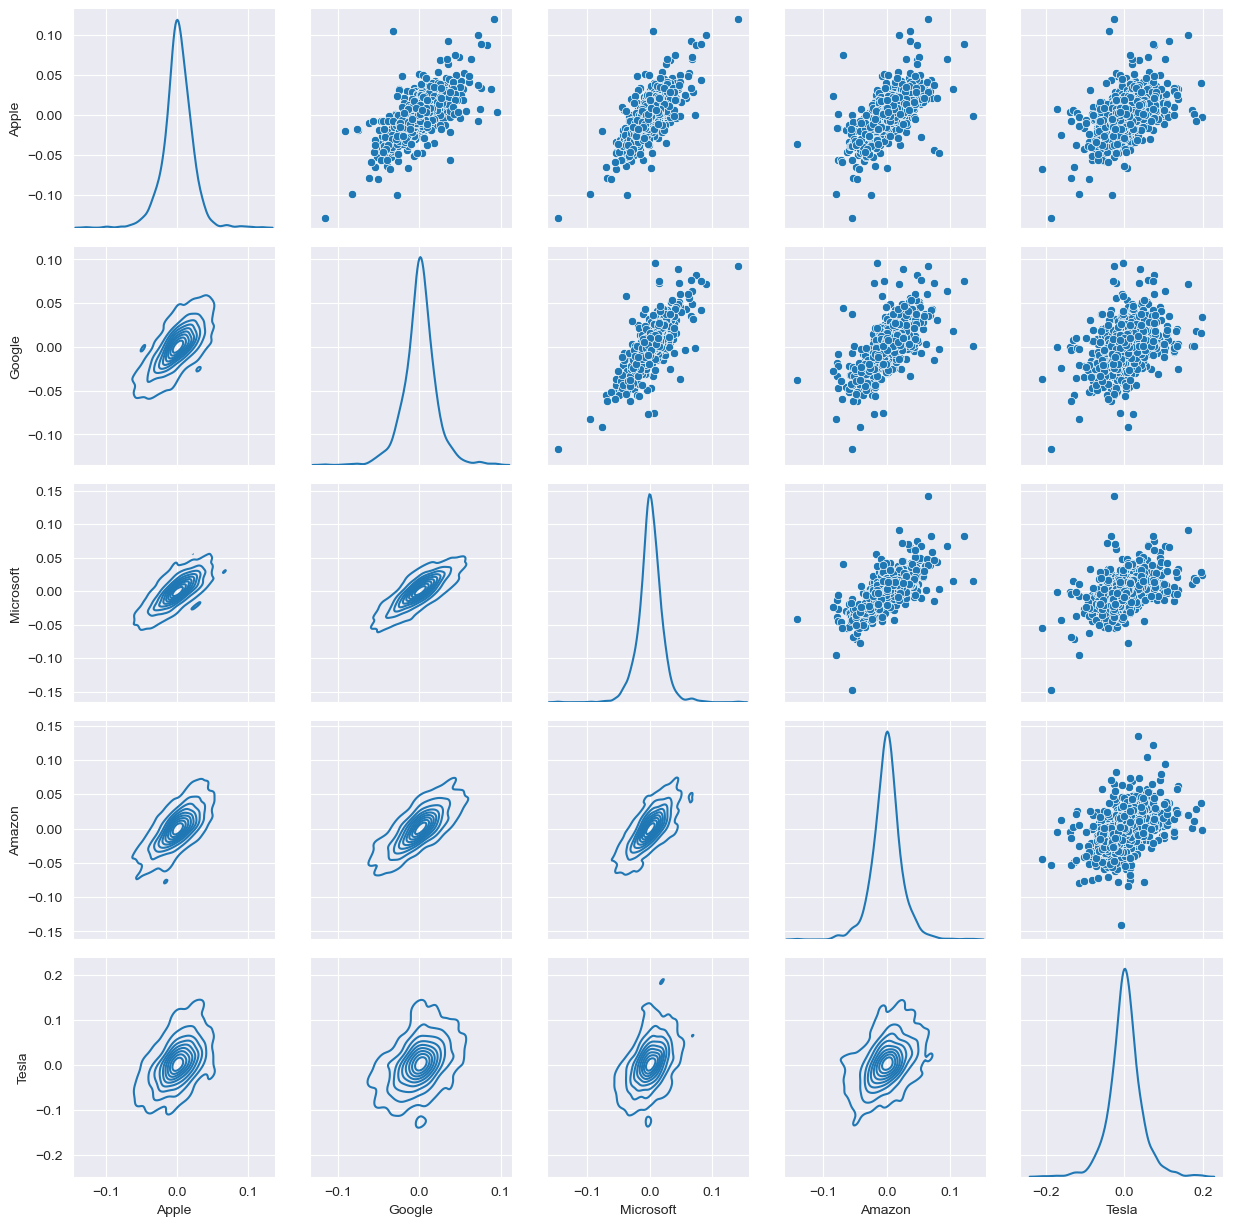

In [41]:
g = sns.PairGrid(stock_df, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

Finally, we could also do a correlation plot with a heatmap, to get actual numerical values for the correlation between the stocks' daily return values.

Text(0.5, 1.0, 'Correlation of stock return')

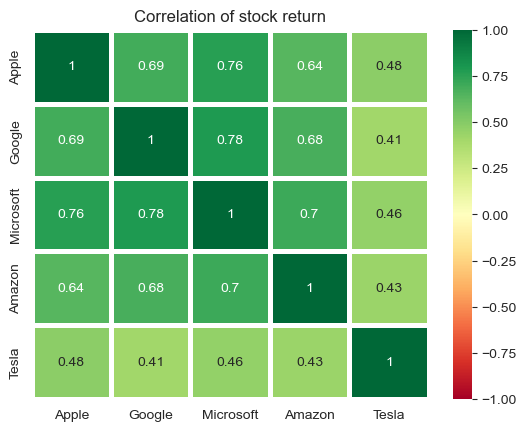

In [42]:
sns.heatmap(stock_df.corr(), cmap='RdYlGn',annot=True,vmax=1.0, vmin=-1.0 ,linewidths=2.5)
plt.title('Correlation of stock return')

Text(0.5, 1.0, 'Correlation of closing price')

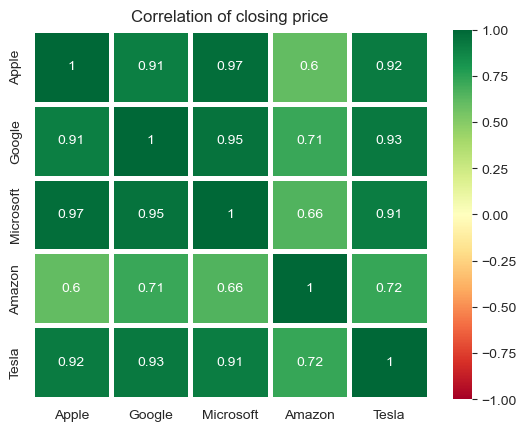

In [43]:
close_df=pd.concat([apple['Close'],google['Close'],mcro['Close'],amazon['Close'],tesla['Close']],axis=1)
close_df.columns=['Apple','Google','Microsoft','Amazon','Tesla']
sns.heatmap(close_df.corr(), cmap='RdYlGn',annot=True,vmax=1.0, vmin=-1.0 ,linewidths=2.5)
plt.title('Correlation of closing price')

From the above map we can see that apple and microsoft are strongly positively corelated also none of the stocks were negative.

# Cumulative return of stocks

The cumprod() method returns the DataFrame with a cumulative product in each row.

In [44]:
apple['Cum_return']=(1+apple['Dailyreturn']).cumprod()
apple['Cum_return'].fillna(0,inplace=True)

In [45]:
google['Cum_return']=(1+google['Dailyreturn']).cumprod()
google['Cum_return'].fillna(0,inplace=True)

In [46]:
google.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Marketcap,SMA50,SMA100,SMA200,Dailyreturn,Cum_return
Date,,,,,,,,,,,,,
2018-09-14 00:00:00-04:00,59.400002,59.400002,58.675999,58.898998,24176000,0.0,0.0,1.436054e+09,NaN,NaN,NaN,0.000000,1.000000
2018-09-17 00:00:00-04:00,58.888500,59.091000,57.923000,57.991501,34096000,0.0,0.0,2.007862e+09,NaN,NaN,NaN,-0.015408,0.984592
2018-09-18 00:00:00-04:00,58.132999,59.066502,58.071499,58.355499,32314000,0.0,0.0,1.878510e+09,NaN,NaN,NaN,0.006277,0.990772
2018-09-19 00:00:00-04:00,58.448002,58.813499,57.931000,58.713501,25962000,0.0,0.0,1.517427e+09,NaN,NaN,NaN,0.006135,0.996851
2018-09-20 00:00:00-04:00,59.033501,59.700001,58.812500,59.578499,29244000,0.0,0.0,1.726376e+09,NaN,NaN,NaN,0.014733,1.011537


In [47]:
mcro['Cum_return']=(1+mcro['Dailyreturn']).cumprod()
mcro['Cum_return'].fillna(0,inplace=True)

In [48]:
mcro.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Marketcap,SMA50,SMA100,SMA200,Dailyreturn,Cum_return
Date,,,,,,,,,,,,,
2018-09-14 00:00:00-04:00,107.400832,107.751385,106.529197,107.410309,19122300,0.0,0.0,2.053751e+09,NaN,NaN,NaN,0.000000,1.000000
2018-09-17 00:00:00-04:00,107.713502,107.722971,105.979700,106.244980,20736500,0.0,0.0,2.233601e+09,NaN,NaN,NaN,-0.010849,0.989151
2018-09-18 00:00:00-04:00,106.292351,107.722967,105.847057,107.258728,22170900,0.0,0.0,2.356597e+09,NaN,NaN,NaN,0.009542,0.998589
2018-09-19 00:00:00-04:00,107.107133,107.362936,105.202793,105.828094,21728400,0.0,0.0,2.327267e+09,NaN,NaN,NaN,-0.013338,0.985269
2018-09-20 00:00:00-04:00,106.377605,107.817705,106.046005,107.599792,23714500,0.0,0.0,2.522692e+09,NaN,NaN,NaN,0.016741,1.001764


In [49]:
amazon['Cum_return']=(1+amazon['Dailyreturn']).cumprod()
amazon['Cum_return'].fillna(0,inplace=True)

In [50]:
amazon.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Marketcap,SMA50,SMA100,SMA200,Dailyreturn,Cum_return
Date,,,,,,,,,,,,,
2018-09-14 00:00:00-04:00,99.646500,99.682503,97.960999,98.509499,72840000,0.0,0.0,7.258251e+09,NaN,NaN,NaN,0.000000,1.000000
2018-09-17 00:00:00-04:00,97.736504,97.841003,94.370499,95.401497,141004000,0.0,0.0,1.378124e+10,NaN,NaN,NaN,-0.031550,0.968450
2018-09-18 00:00:00-04:00,95.932503,97.910004,95.772003,97.052498,85374000,0.0,0.0,8.190141e+09,NaN,NaN,NaN,0.017306,0.985210
2018-09-19 00:00:00-04:00,97.025002,97.041496,95.245003,96.320999,81136000,0.0,0.0,7.872221e+09,NaN,NaN,NaN,-0.007537,0.977784
2018-09-20 00:00:00-04:00,96.929001,97.750000,96.612503,97.214996,63098000,0.0,0.0,6.116026e+09,NaN,NaN,NaN,0.009281,0.986859


In [51]:
tesla['Cum_return']=(1+tesla['Dailyreturn']).cumprod()
tesla['Cum_return'].fillna(0,inplace=True)

In [52]:
tesla.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Marketcap,SMA50,SMA100,SMA200,Dailyreturn,Cum_return
Date,,,,,,,,,,,,,
2018-09-14 00:00:00-04:00,19.250668,19.822001,19.101334,19.680000,101484000,0.0,0.0,1.953635e+09,NaN,NaN,NaN,0.000000,1.000000
2018-09-17 00:00:00-04:00,19.336000,20.058001,19.208668,19.656000,103314000,0.0,0.0,1.997680e+09,NaN,NaN,NaN,-0.001220,0.998780
2018-09-18 00:00:00-04:00,19.779333,20.176001,18.366667,18.997334,248212500,0.0,0.0,4.909478e+09,NaN,NaN,NaN,-0.033510,0.965312
2018-09-19 00:00:00-04:00,18.700666,20.000000,18.700001,19.934668,124423500,0.0,0.0,2.326802e+09,NaN,NaN,NaN,0.049340,1.012940
2018-09-20 00:00:00-04:00,20.237333,20.398666,19.555332,19.888666,110241000,0.0,0.0,2.230984e+09,NaN,NaN,NaN,-0.002308,1.010603


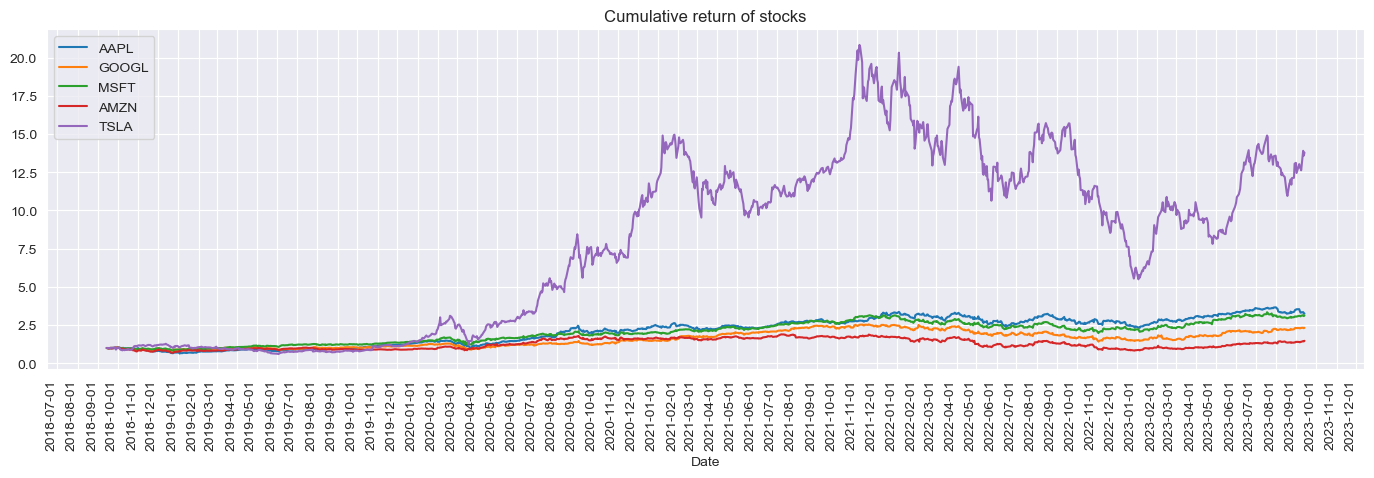

In [53]:
plt.figure(figsize=(17,5))

apple['Cum_return'].plot(label='AAPL')
google['Cum_return'].plot(label='GOOGL')
mcro['Cum_return'].plot(label='MSFT')
amazon['Cum_return'].plot(label='AMZN')
tesla['Cum_return'].plot(label='TSLA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Cumulative return of stocks')
plt.xticks(rotation=90)
plt.legend();

From the above graph we can see that Tesla stock has highest cumulative return compared to others and Amazon has lowest cumulative return.

In [54]:
tesla['Volume'].argmax()

348

In [55]:
tesla.iloc[[tesla['Volume'].argmax()]]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Marketcap,SMA50,SMA100,SMA200,Dailyreturn,Cum_return
Date,,,,,,,,,,,,,
2020-02-04 00:00:00-05:00,58.863998,64.599335,55.591999,59.137333,914082000,0.0,0.0,5.380652e+10,30.286467,24.480487,19.826287,0.137256,3.004946


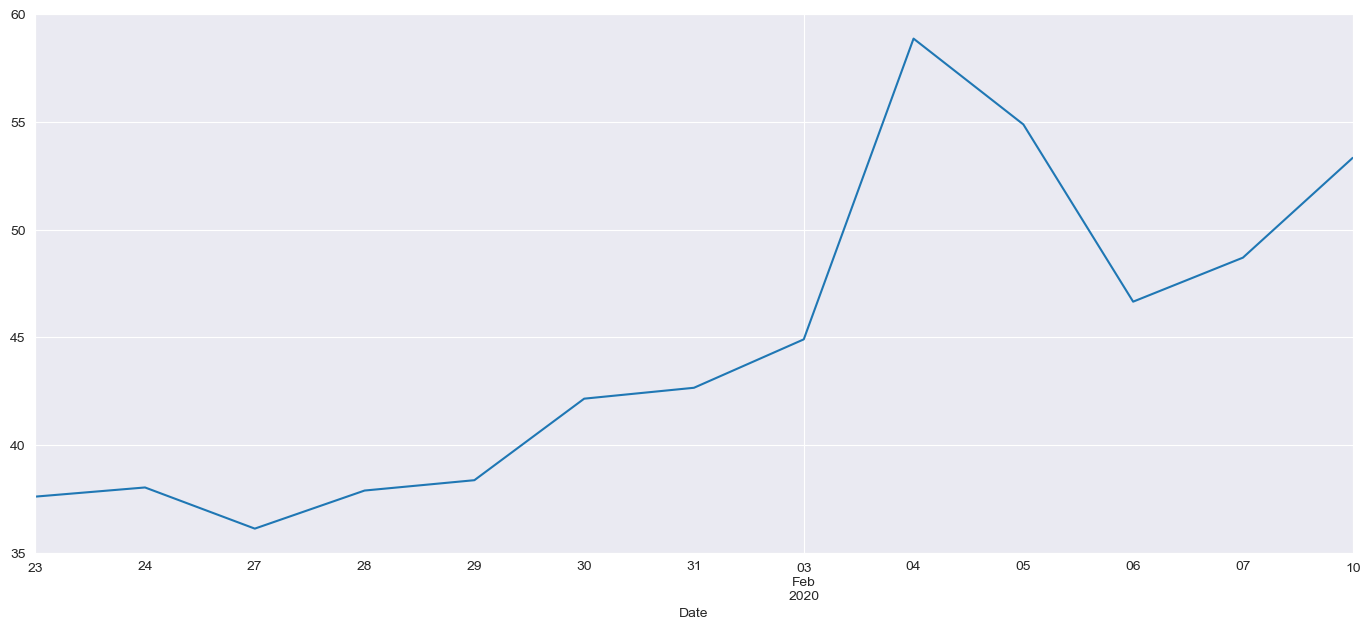

In [56]:
tesla.iloc[340:353]['Open'].plot(figsize=(17,7));

when Volume increases and the stock price decreased. They drop their stock prices and the volume increases.